In [ ]:
!pip install patchify
!pip install albumentations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

(1104, 256, 256, 3)


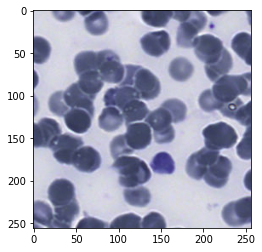

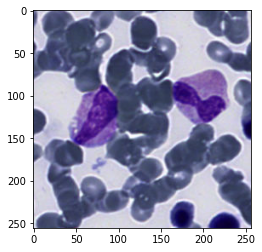

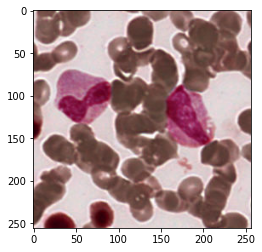

In [5]:
import numpy as np
from patchify import patchify, unpatchify
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.filters import threshold_otsu
import skimage
import albumentations as A
import cv2

def augment_image(image):
    # Declare an augmentation pipeline
    transform = A.Compose([
        A.RandomCrop(width=256, height=256),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ])
    # convert the image to RGB colorspace
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Augment an image
    transformed = transform(image=image)
    transformed_image = transformed["image"]
    return transformed_image

def read_image(Path="drive/MyDrive/region.png"):
  """
  read_image(Path="drive/MyDrive/region.png")
  This function reads an image from the specified path and returns it as a numpy array.
  Parameters:
  Path (str): path to the image file (default: "drive/MyDrive/region.png")
  Returns:
  np.array: image data as a numpy array
  """
  im = Image.open(Path)
  return np.array(im)



def extract_patches(image, patch_size = (256, 256,3) ,step=256):
  """
  extract_patches(image, patch_size = (256, 256,3) ,step=256)
  This function takes an image and extracts smaller patches from it with no overlapping.
  Parameters:
  image (np.array): image data as a numpy array
  patch_size (tuple): tuple of integers specifying the size of each patch (default: (256, 256,3))
  step (int): number of pixels to move the patch in the x and y direction for non-overlapping (default: 256)
  Returns:
  list: list of patches as numpy arrays"""

  patches = patchify(image, patch_size,step)
  patches = patches.reshape(-1, 256, 256, 3)
  return patches


def binary_img(random_patch):
    # convert the image to grayscale
    random_patch = cv2.cvtColor(random_patch, cv2.COLOR_BGR2GRAY)
    # get the global optimal threshold for the leopard image
    globalthreshold = threshold_otsu(random_patch)
    # apply the threshold to the gray image to obtain a binary image
    BinaryImg = random_patch > globalthreshold
    return BinaryImg


def display_Random_patches(patches):
  """
  display_Random_patches(patches)
  This function takes a list of patches and displays one patch randomly .
  Parameters:
  patches (np.array): patches data as a numpy array
  Returns:
  None
  """
  C=patches.shape[0]
  R=patches.shape[1]
  random_number = np.random.randint(1, min(patches.shape[0], patches.shape[1]))
  plt.imshow(patches[random_number,:,:,:], cmap='gray')
  plt.show()

def Output_Random_patches(patches):
  """
  Output_Random_patches(patches)
  This function takes a list of patches and return a random image from the patches.
  Parameters:
  patches (np.array): patches data as a numpy array
  Returns:
  A random image in the form of numpy array
  """
  C=patches.shape[0]
  R=patches.shape[1]
  random_number = np.random.randint(1, min(patches.shape[0], patches.shape[1]))
  return patches[random_number,:]
 
def display_Allpatches(patches):
  """
  display_patches(patches)
  This function takes a list of patches and displays them as a grid of images.
  Parameters:
  patches (np.array): patches data as a numpy array
  Returns:
  None
  """
  for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
      plt.imshow(patches[i,j,0,:,:], cmap='gray')
      plt.show()

img=read_image(Path="drive/MyDrive/region.png")
patches=extract_patches(img, patch_size = (256, 256,3) ,step=256)
print(patches.shape)
display_Random_patches(patches)
Random_patch=Output_Random_patches(patches)
# Random_patch=binary_img(Random_patch)
plt.imshow(Random_patch, cmap='gray')
transformed_image = augment_image(Random_patch)
plt.show()
plt.imshow(transformed_image)
plt.show()

